In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.cloud import bigquery

In [3]:
client = bigquery.Client()
dataset_ref = client.dataset('ncaa_basketball', project='bigquery-public-data')
ncaa_dataset = client.get_dataset(dataset_ref)

In [4]:
[x.table_id for x in client.list_tables(ncaa_dataset)]

['mascots',
 'mbb_games_sr',
 'mbb_historical_teams_games',
 'mbb_historical_teams_seasons',
 'mbb_historical_tournament_games',
 'mbb_pbp_sr',
 'mbb_players_games_sr',
 'mbb_teams',
 'mbb_teams_games_sr',
 'team_colors']

In [5]:
ncaa_mbb_pbp_sr = client.get_table(ncaa_dataset.table('mbb_pbp_sr'))

In [6]:
query="""SELECT
  event_type,
  season,
  type,
  team_alias,
  team_market,
  team_name,
  team_basket,
  event_coord_x,
  event_coord_y,
  three_point_shot,
  shot_made
FROM `bigquery-public-data.ncaa_basketball.mbb_pbp_sr`
WHERE season = 2017 AND type = "fieldgoal"
ORDER BY season"""

# Set up the query
query_job = client.query(query)
# API request - run the query, and return a pandas DataFrame
df_shots = query_job.to_dataframe()
df_shots

,event_type,season,type,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made
0,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,88.0,255.0,False,False
1,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,99.0,255.0,False,False
2,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,71.0,327.0,False,False
3,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,240.0,177.0,False,False
4,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,237.0,336.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
261170,threepointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,left,196.0,34.0,True,False
261171,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,right,1027.0,327.0,False,False
261172,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,left,109.0,300.0,False,False
261173,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,right,990.0,160.0,False,False


In [7]:
team_names = df_shots["team_alias"].unique()

In [8]:
teams = sorted(team_names, key=lambda x: '' if x is None else x)

In [9]:
df_shots[df_shots["team_alias"] == 'MSU']

,event_type,season,type,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made
22325,twopointmade,2017,fieldgoal,MSU,Michigan State,Spartans,right,1086.0,277.0,False,True
22326,twopointmiss,2017,fieldgoal,MSU,Michigan State,Spartans,right,1028.0,149.0,False,False
22327,twopointmiss,2017,fieldgoal,MSU,Michigan State,Spartans,left,134.0,269.0,False,False
22328,twopointmiss,2017,fieldgoal,MSU,Michigan State,Spartans,right,1050.0,346.0,False,False
22329,threepointmiss,2017,fieldgoal,MSU,Michigan State,Spartans,left,202.0,536.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
242920,twopointmiss,2017,fieldgoal,MSU,Michigan State,Spartans,left,168.0,190.0,False,False
242921,twopointmiss,2017,fieldgoal,MSU,Michigan State,Spartans,left,228.0,272.0,False,False
242922,threepointmiss,2017,fieldgoal,MSU,Michigan State,Spartans,right,779.0,300.0,True,False
242923,twopointmade,2017,fieldgoal,MSU,Michigan State,Spartans,right,1021.0,312.0,False,True


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

In [11]:
mask = (df_shots['team_basket'] == 'right')
z_valid = df_shots[mask]

df_shots['coord_x'] = df_shots['event_coord_x']
df_shots.loc[mask, 'coord_x'] = (94*12) - z_valid['event_coord_x'] 

df_shots['coord_y'] = df_shots['event_coord_y']
df_shots.loc[mask, 'coord_y'] = (50*12) - z_valid['event_coord_y'] 

df_shots

,event_type,season,type,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made,coord_x,coord_y
0,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,88.0,255.0,False,False,88.0,255.0
1,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,99.0,255.0,False,False,99.0,255.0
2,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,71.0,327.0,False,False,71.0,327.0
3,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,240.0,177.0,False,False,240.0,177.0
4,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,237.0,336.0,False,False,237.0,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261170,threepointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,left,196.0,34.0,True,False,196.0,34.0
261171,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,right,1027.0,327.0,False,False,101.0,273.0
261172,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,left,109.0,300.0,False,False,109.0,300.0
261173,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,right,990.0,160.0,False,False,138.0,440.0


In [12]:
# convert and rotate 90 degrees counter clockwise
df_shots['coord_x'] = (df_shots['coord_x']/12)
df_shots['coord_y'] = 25 - (df_shots['coord_y']/12)
df_shots['x'] = -1*(df_shots['coord_y'])
df_shots['y'] = (df_shots['coord_x']) - 5.25

In [13]:


# create shot distance and shot angle

df_shots['shot_distance'] = np.floor(np.sqrt(np.multiply(df_shots['x'],df_shots['x']) + np.multiply(df_shots['y'],df_shots['y'])))
df_shots['shot_angle'] = np.arccos(np.divide(df_shots['x'],df_shots['shot_distance'])) * 180/np.pi



/home/matteo/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in arccos


In [14]:
def circle_points(center = np.array([0,0]), radius = 1, npoints = 360):
    angles = np.linspace(start = 0, stop = 360, num = npoints,)
    xx = np.repeat(center[0],npoints) + radius * np.cos(angles * np.pi/180)
    yy = np.repeat(center[1],npoints) + radius*np.sin(angles * np.pi/180)
    data = {'x':xx,'y':yy}
    df = pd.DataFrame(data)
    return df

In [49]:
# Court plot

width = 50
height = 94 / 2
key_height = 19
inner_key_width = 12
outer_key_width = 16
backboard_width = 6
backboard_offset = 4
neck_length = 0.5
hoop_radius = 0.75
hoop_center_y = backboard_offset + neck_length + hoop_radius
three_point_radius = 23.75
three_point_side_radius = 22
three_point_side_height = 14
college_three_radius = 20.75

data = {'x':[width / 2, width / 2, -width / 2, -width / 2, width / 2] , 'y':[height, 0, 0, height, height]}
court_points = pd.DataFrame(data)
court_points['desc'] = np.repeat('perimeter',len(court_points.index))
court_points['y'] = court_points['y'] - 5.25

data = {'x':[outer_key_width / 2, outer_key_width / 2, -outer_key_width / 2, -outer_key_width / 2] , 'y':[0, key_height, key_height, 0]}
outer_key = pd.DataFrame(data)
outer_key['desc'] = np.repeat('outer_key',len(outer_key.index))
outer_key['y'] = outer_key['y'] - 5.25

#court_points = court_points.append(temp, ignore_index=True)

data = {'x':[-backboard_width / 2, backboard_width / 2] , 'y':[backboard_offset, backboard_offset]}
backboard = pd.DataFrame(data)
backboard['desc'] = np.repeat('backboard',len(backboard.index))
backboard['y'] = backboard['y'] - 5.25
#court_points = court_points.append(temp, ignore_index=True)

data = {'x':[0, 0] , 'y':[backboard_offset, backboard_offset + neck_length]}
neck = pd.DataFrame(data)
neck['desc'] = np.repeat('neck',len(neck.index))
neck['y'] = neck['y'] - 5.25
#court_points = court_points.append(temp, ignore_index=True)

foul_circle = circle_points(center = [0,key_height], radius = inner_key_width / 2)
foul_circle['desc'] = np.repeat('foul_circle_top',len(foul_circle.index))
foul_circle.loc[foul_circle['y'] < key_height,'desc'] = 'foul_circle_bottom'
foul_circle['y'] = foul_circle['y'] - 5.25

hoop = circle_points(center = [0,hoop_center_y], radius = hoop_radius)
hoop['desc'] = np.repeat('hoop',len(hoop.index))
hoop['y'] = hoop['y'] - 5.25

restricted = circle_points(center = [0,hoop_center_y], radius = 4)
restricted = restricted[restricted.y >= hoop_center_y]
restricted['desc'] = np.repeat('restricted',len(restricted.index))
restricted['y'] = restricted['y'] - 5.25

college_three_circle = circle_points(center = [0,hoop_center_y], radius = college_three_radius)
college_three_circle = college_three_circle[college_three_circle.y >= hoop_center_y]
college_three_circle['y'] = college_three_circle['y'] - 5.25

data = {'x':[ -college_three_radius, -college_three_radius] , 'y':[ hoop_center_y, 0]}
college_three_line = pd.DataFrame(data)
college_three_line['y'] = college_three_line['y'] - 5.25

data = {'x':[ college_three_radius, college_three_radius] , 'y':[ hoop_center_y, 0]}
college_three_linea = pd.DataFrame(data)
college_three_linea['y'] = college_three_linea['y'] - 5.25

college_key = pd.DataFrame()
data = {'x':[inner_key_width / 2, inner_key_width / 2, -inner_key_width / 2, -inner_key_width / 2] , 'y':[0, key_height, key_height, 0]}
temp = pd.DataFrame(data)
temp['desc'] = np.repeat('college_key',len(temp.index))
temp['desc'] = np.repeat('college_key', len(temp.index))
college_key = pd.concat([college_key, temp], ignore_index=True)
college_key['y'] = college_key['y'] - 5.25
college_key['y'] = college_key['y'] - 5.25

In [50]:
college_court = p9.ggplot()
college_court = college_court + p9.geom_path(court_points, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(outer_key, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(backboard, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(foul_circle, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(hoop, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(restricted, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(college_three_circle, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(college_key, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(college_three_line, mapping=p9.aes(x='x',y='y'))
college_court = college_court + p9.geom_path(college_three_linea, mapping=p9.aes(x='x',y='y'))

college_court

TypeError: __init__() got multiple values for argument 'mapping'

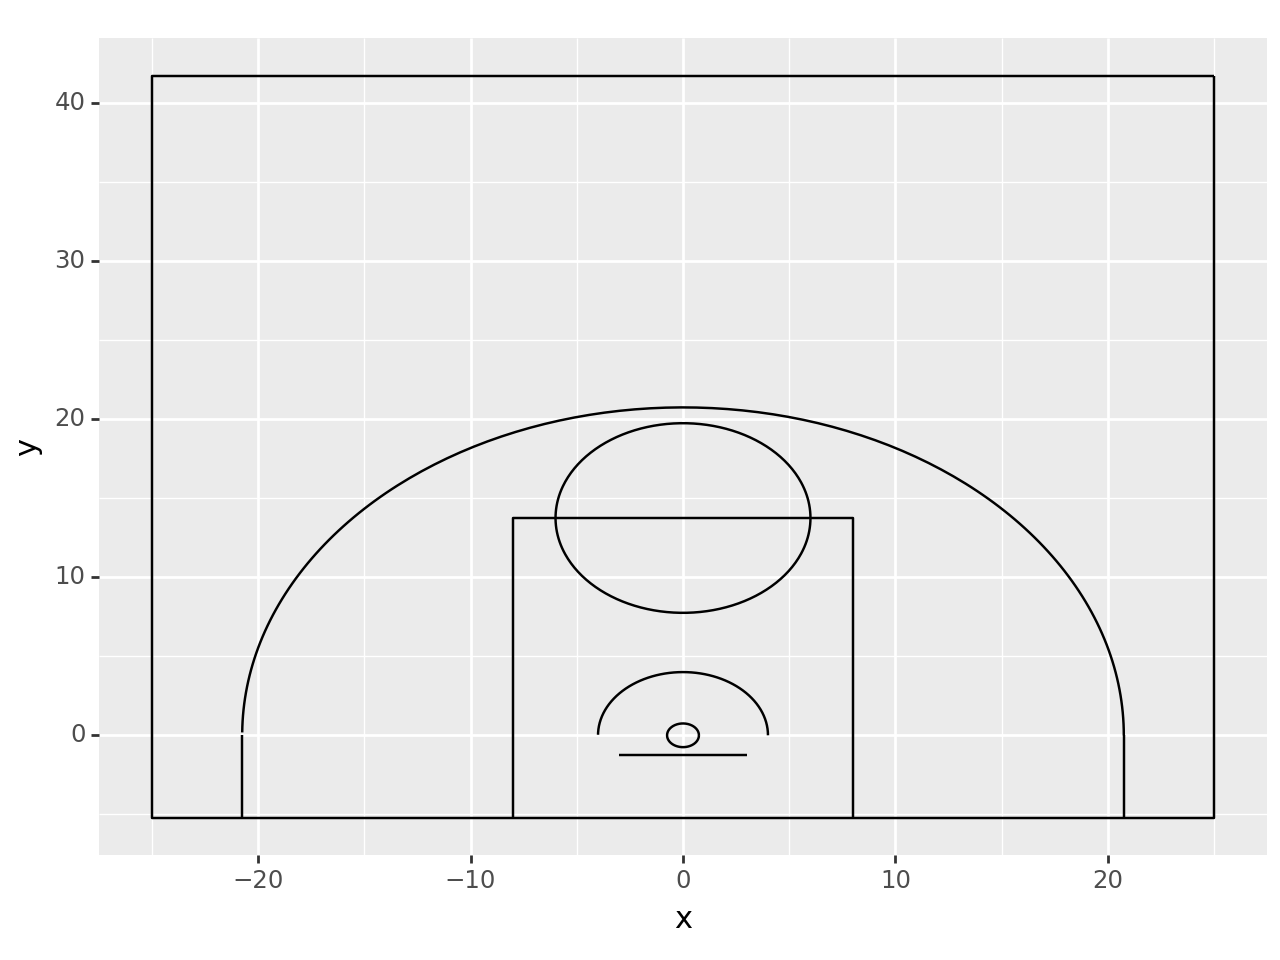

<Figure Size: (640 x 480)>

In [106]:
import plotnine as p9

college_court = p9.ggplot()

# Swap the parameters for data and mapping in geom_path
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=court_points)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=outer_key)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=backboard)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=foul_circle)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=hoop)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=restricted)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=college_three_circle)
#college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=college_key)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=college_three_line)
college_court += p9.geom_path(mapping=p9.aes(x='x', y='y'), data=college_three_linea)

college_court

In [97]:
df_shots

,event_type,season,type,team_alias,team_market,team_name,team_basket,event_coord_x,event_coord_y,three_point_shot,shot_made,coord_x,coord_y,x,y,shot_distance,shot_angle
0,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,88.0,255.0,False,False,7.333333,3.750000,-3.750000,2.083333,4.0,159.635865
1,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,99.0,255.0,False,False,8.250000,3.750000,-3.750000,3.000000,4.0,159.635865
2,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,71.0,327.0,False,False,5.916667,-2.250000,2.250000,0.666667,2.0,NaN
3,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,240.0,177.0,False,False,20.000000,10.250000,-10.250000,14.750000,17.0,127.080836
4,twopointmiss,2017,fieldgoal,KU,Kansas,Jayhawks,left,237.0,336.0,False,False,19.750000,-3.000000,3.000000,14.500000,14.0,77.626375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261170,threepointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,left,196.0,34.0,True,False,16.333333,22.166667,-22.166667,11.083333,24.0,157.459846
261171,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,right,1027.0,327.0,False,False,8.416667,2.250000,-2.250000,3.166667,3.0,138.590378
261172,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,left,109.0,300.0,False,False,9.083333,0.000000,-0.000000,3.833333,3.0,90.000000
261173,twopointmiss,2017,fieldgoal,UTRGV,Texas Rio Grande Valley,Vaqueros,right,990.0,160.0,False,False,11.500000,-11.666667,11.666667,6.250000,13.0,26.176952


In [103]:
df_msu = df_shots[df_shots["team_alias"] == 'MSU']
df_msu = df_msu[df_msu["y"] < 50]
msu_x = df_msu['x']
msu_y = df_msu['y']
msu_made = df_msu["shot_made"]
msu_coordinates = {'x': msu_x, 'y': msu_y, 'shot_made':msu_made}
df = pd.DataFrame(msu_coordinates)

In [109]:
shot_map = college_court + p9.geom_point(p9.aes( x= 'x', y= 'y', color = 'shot_made'),df, alpha =0.5)
shot_map += p9.theme(figure_size=(10, 10))
shot_map += p9.coord_fixed(ratio=1)

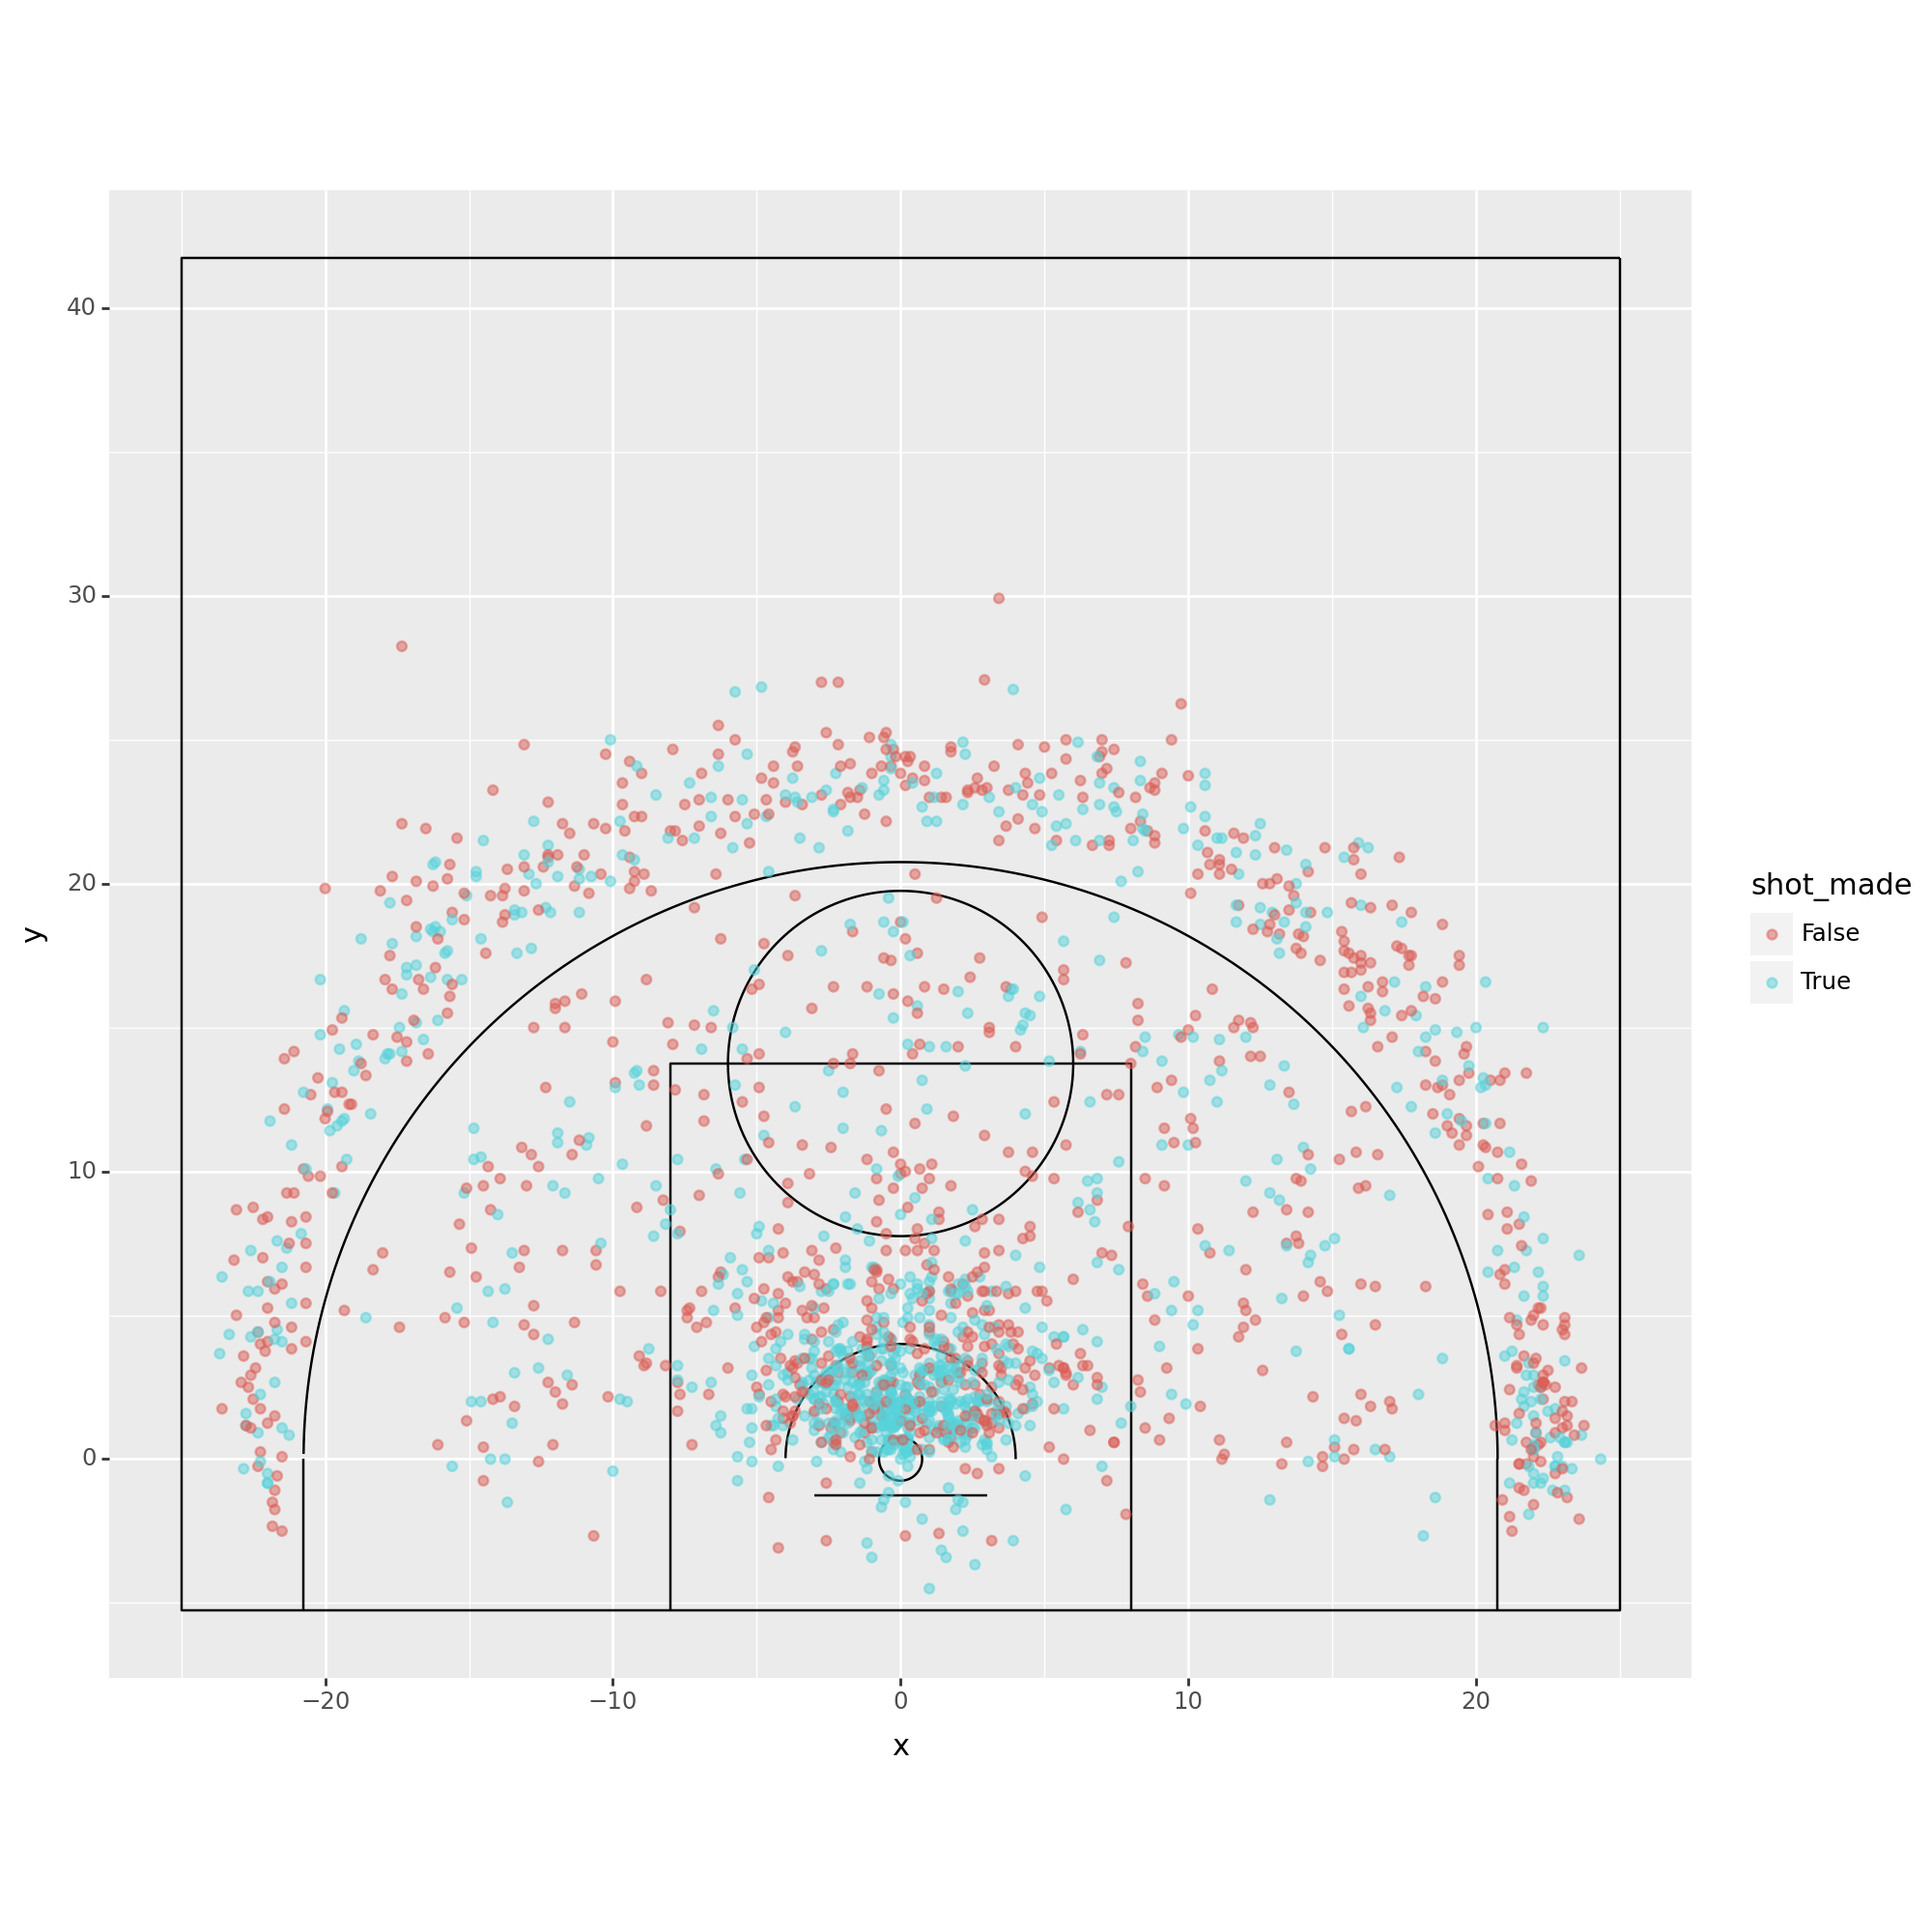

<Figure Size: (1000 x 1000)>

In [110]:
shot_map